#**Python Data Analyst Project: Streaming Services**

---



In [1]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#uploading cvs files
disney=pd.read_csv("disney_plus_titles.csv")
hulu = pd.read_csv("hulu_titles.csv")
netflix = pd.read_csv("netflix_titles.csv")

##**Exploratory Data Analysis**


---





TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: rating, dtype: int64

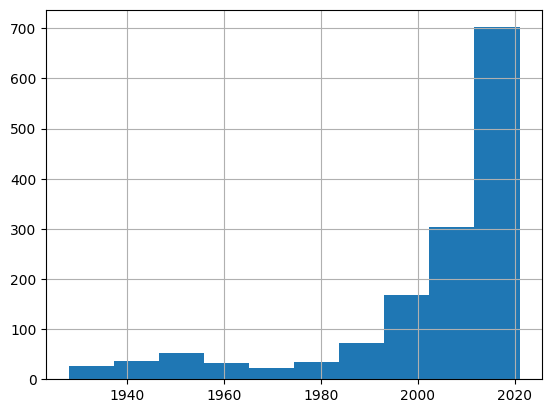

In [3]:
#Creating a histogram for release year

disney.head(5)
disney["release_year"].value_counts()
disney["release_year"].hist(bins=10)
disney["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

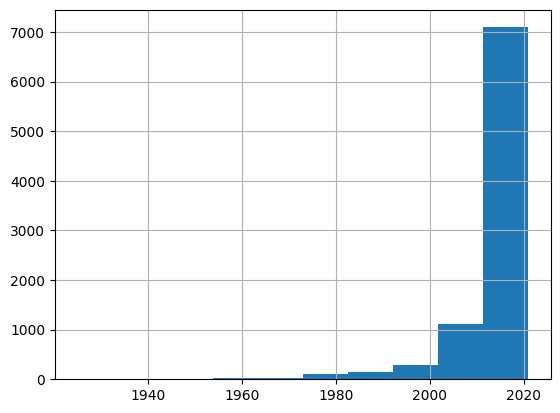

In [4]:
#Creating a histogram for release year

netflix.head(5)
netflix["release_year"].value_counts()
netflix["release_year"].hist(bins=10)
netflix["rating"].value_counts()

TV-14     691
TV-MA     391
R         345
TV-PG     321
PG-13     163
         ... 
34 min      1
47 min      1
65 min      1
37 min      1
71 min      1
Name: rating, Length: 88, dtype: int64

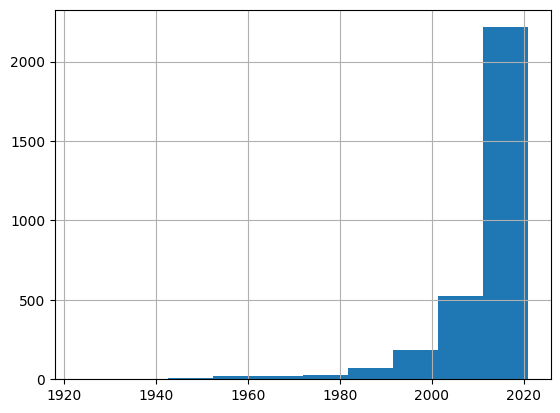

In [5]:
#Creating a histogram for release year
hulu.head(5)
hulu["release_year"].value_counts()
hulu["release_year"].hist(bins=10)
hulu["rating"].value_counts()

In [6]:
#Seeing how large the datasets are
h_shape= hulu.shape
n_shape= netflix.shape
d_shape= disney.shape
print(h_shape, n_shape, d_shape)

(3073, 12) (8807, 12) (1450, 12)


In [7]:
hulu.isna().sum()

show_id            0
type               0
title              0
director        3070
cast            3073
country         1453
date_added        28
release_year       0
rating           520
duration         479
listed_in          0
description        4
dtype: int64

In [8]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
disney.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
#dropping columns with the most NA values
hulu=hulu.drop(columns=["director", "cast"])
netflix=netflix.drop(columns=["director", "cast"])
disney=disney.drop(columns=["director", "cast"])

In [11]:
#Exploring unique values of columns
hulu.head(5)
columns_of_interest = ['type', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']
subset_hulu = hulu[columns_of_interest]
unique_values = subset_hulu.apply(lambda x: x.unique())
print(unique_values)


type                                             [Movie, TV Show]
country         [nan, United States, Japan, United Kingdom, Un...
date_added      [October 24, 2021, October 23, 2021, October 2...
release_year    [2021, 2020, 2003, 2011, 2015, 2012, 2009, 201...
rating          [TV-MA, nan, PG-13, R, TV-14, PG, TV-PG, NOT R...
duration        [nan, 94 min, 108 min, 97 min, 104 min, 1 Seas...
listed_in       [Comedy, Stand Up, Crime, Drama, Thriller, Act...
dtype: object


In [12]:
#Exploring unique values of columns

disney.head(5)
columns_of_interest = ['type', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']
subset_disney = disney[columns_of_interest]
unique_values = subset_disney.apply(lambda x: x.unique())
print(unique_values)

type                                             [Movie, TV Show]
country         [nan, United States, United States, Canada, Un...
date_added      [November 26, 2021, November 25, 2021, Novembe...
release_year    [2016, 1988, 2011, 2021, 2015, 2019, 2008, 202...
rating          [TV-G, PG, TV-PG, nan, PG-13, TV-14, G, TV-Y7,...
duration        [23 min, 91 min, 41 min, 1 Season, 94 min, 2 S...
listed_in       [Animation, Family, Comedy, Animation, Comedy,...
dtype: object


In [13]:
#Exploring unique values of columns

netflix.head(5)
columns_of_interest = ['type', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']
subset_netflix = netflix[columns_of_interest]
unique_values = subset_netflix.apply(lambda x: x.unique())
print(unique_values)

type                                             [Movie, TV Show]
country         [United States, South Africa, nan, India, Unit...
date_added      [September 25, 2021, September 24, 2021, Septe...
release_year    [2020, 2021, 1993, 2018, 1996, 1998, 1997, 201...
rating          [PG-13, TV-MA, PG, TV-14, TV-PG, TV-Y, TV-Y7, ...
duration        [90 min, 2 Seasons, 1 Season, 91 min, 125 min,...
listed_in       [Documentaries, International TV Shows, TV Dra...
dtype: object


#**Creating DataFrames that illustrate the number of shows and movies released by Month-Year**
---


In [14]:
#Importing important packages 

from datetime import datetime
import matplotlib.pyplot as plt

In [15]:
#Copying datasets 
hulu_1=hulu.copy()
netflix_1=netflix.copy()
disney_1=disney.copy()

In [16]:
#Changing date_added column into a date data type
hulu_1['date_added'] = pd.to_datetime(hulu_1['date_added'])
netflix_1['date_added'] = pd.to_datetime(netflix_1['date_added'])
disney_1['date_added'] = pd.to_datetime(disney_1['date_added'])


In [17]:
#Creating a month-year colum from the date_added column 
hulu_1['Month_Year'] = hulu_1['date_added'].apply(lambda x: datetime.strftime(x, '%Y-%m') if pd.notnull(x) else '')
netflix_1['Month_Year'] = netflix_1['date_added'].apply(lambda x: datetime.strftime(x, '%Y-%m') if pd.notnull(x) else '')
disney_1['Month_Year'] = disney_1['date_added'].apply(lambda x: datetime.strftime(x, '%Y-%m') if pd.notnull(x) else '')

In [18]:
#Creating dummy variables for type column
hulu_release = hulu_1[['Month_Year', 'type']]
hulu_release['Movie'] = hulu_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
hulu_release['TV Show'] = hulu_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Drop the 'type' column since it's no longer needed
hulu_release = hulu_release.drop('type', axis=1)

# Group by 'Month_Year' and calculate the sums
hulu_releases = hulu_release.groupby("Month_Year").sum().reset_index()

print(hulu_releases)

    Month_Year  Movie  TV Show
0                   0       28
1      2006-07      0        1
2      2008-06      0        1
3      2008-07      0        1
4      2009-02      0        1
..         ...    ...      ...
124    2021-06     53       59
125    2021-07    111       30
126    2021-08     62       47
127    2021-09     90       60
128    2021-10    119       44

[129 rows x 3 columns]


<ipython-input-18-7f5ab213bfa8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_release['Movie'] = hulu_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
<ipython-input-18-7f5ab213bfa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hulu_release['TV Show'] = hulu_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)


In [19]:
#Creating dummy variables for type column

netflix_release = netflix_1[['Month_Year', 'type']]
netflix_release['Movie'] = netflix_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
netflix_release['TV Show'] = netflix_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Drop the 'type' column since it's no longer needed
netflix_release = netflix_release.drop('type', axis=1)

# Group by 'Month_Year' and calculate the sums
netflix_releases = netflix_release.groupby("Month_Year").sum().reset_index()

print(netflix_releases)

    Month_Year  Movie  TV Show
0                   0       10
1      2008-01      1        0
2      2008-02      0        1
3      2009-05      1        0
4      2009-11      1        0
..         ...    ...      ...
104    2021-05     94       38
105    2021-06    124       83
106    2021-07    169       88
107    2021-08    117       61
108    2021-09    118       65

[109 rows x 3 columns]


<ipython-input-19-6f2af12adff5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_release['Movie'] = netflix_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
<ipython-input-19-6f2af12adff5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_release['TV Show'] = netflix_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)


In [20]:
#Creating dummy variables for type column 

disney_release = disney_1[['Month_Year', 'type']]
disney_release['Movie'] = disney_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
disney_release['TV Show'] = disney_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)

# Drop the 'type' column since it's no longer needed
disney_release = disney_release.drop('type', axis=1)

# Group by 'Month_Year' and calculate the sums
disney_releases = disney_release.groupby("Month_Year").sum().reset_index()

print(disney_releases)

   Month_Year  Movie  TV Show
0                  0        3
1     2019-10      9        1
2     2019-11    604      126
3     2019-12     17        8
4     2020-01     27       17
5     2020-02     13        7
6     2020-03      8        4
7     2020-04     38       10
8     2020-05     20       14
9     2020-06     19       11
10    2020-07     24       17
11    2020-08     16       10
12    2020-09     12       11
13    2020-10     14        8
14    2020-11     17        8
15    2020-12     22        5
16    2021-01     11        6
17    2021-02     13       11
18    2021-03      6        6
19    2021-04     23       15
20    2021-05     12       16
21    2021-06     11       11
22    2021-07     26       18
23    2021-08     13       11
24    2021-09     16       20
25    2021-10     18       13
26    2021-11     43       11


<ipython-input-20-cead2cd8576b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_release['Movie'] = disney_release['type'].apply(lambda x: 1 if x == 'Movie' else 0)
<ipython-input-20-cead2cd8576b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_release['TV Show'] = disney_release['type'].apply(lambda x: 1 if x == 'TV Show' else 0)


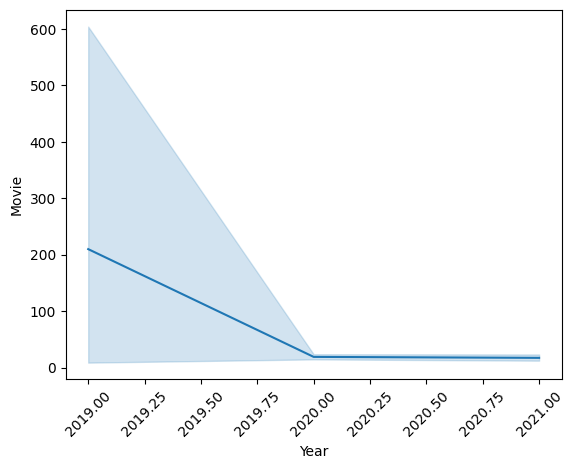

In [134]:
#Plotting graphic to show the amount of movies added by year
disney_releases['Year'] = pd.to_datetime(disney_releases['Month_Year']).dt.year

sns.lineplot(x='Year', y='Movie', data=disney_releases)
plt.xticks(rotation=45)
plt.show()

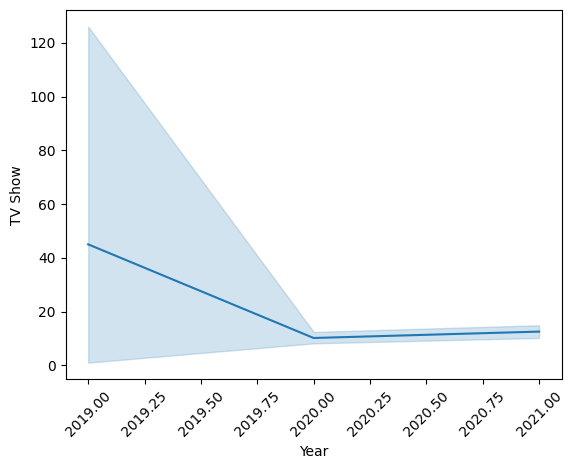

In [133]:
#Plotting graphic to show the amount of shows added by year

sns.lineplot(x='Year', y='TV Show', data=disney_releases)
plt.xticks(rotation=45)
plt.show()

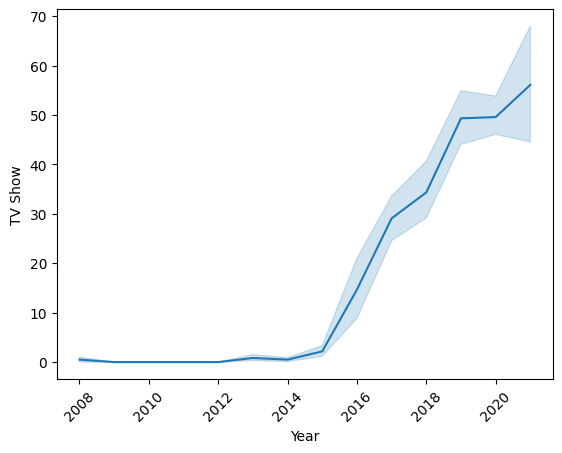

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [129]:
#Plotting graphic to show the amount of shows added by year

netflix_releases['Year'] = pd.to_datetime(netflix_releases['Month_Year']).dt.year

sns.lineplot(x='Year', y='TV Show', data=netflix_releases)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(100, 6))

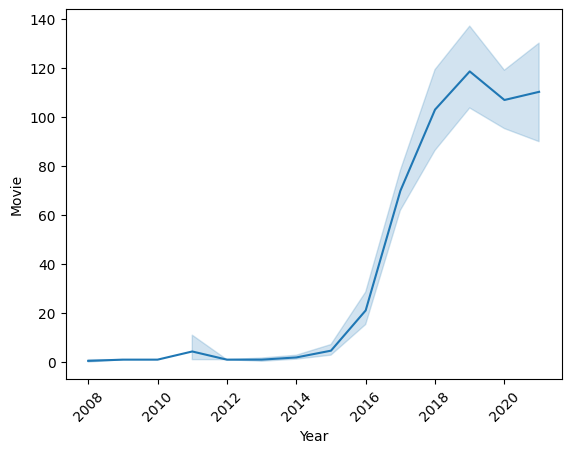

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [130]:
#Plotting graphic to show the amount of movies added by year

sns.lineplot(x='Year', y='Movie', data=netflix_releases)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(100, 6))

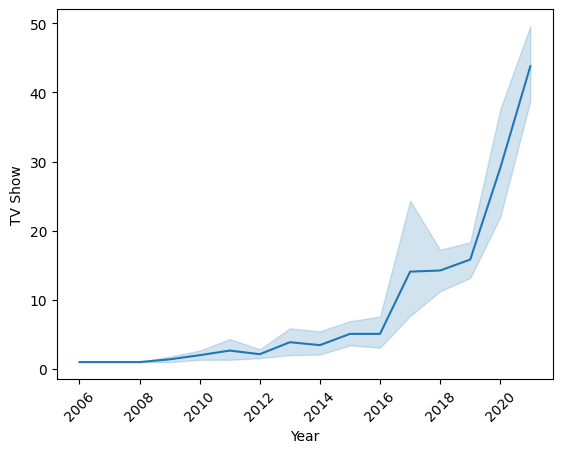

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [131]:
#Plotting graphic to show the amount of shows added by year

hulu_releases['Year'] = pd.to_datetime(hulu_releases['Month_Year']).dt.year

sns.lineplot(x='Year', y='TV Show', data=hulu_releases)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(100, 6))

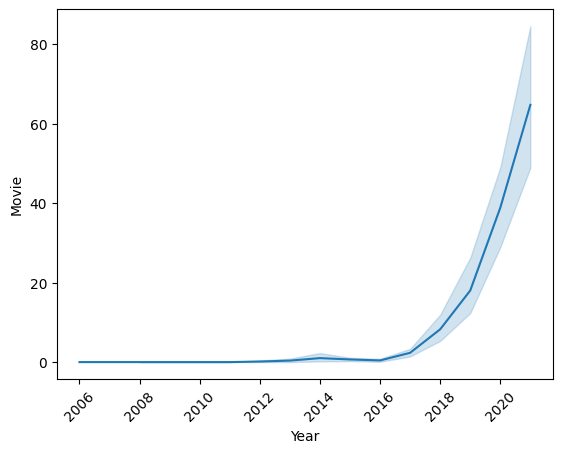

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [132]:
#Plotting graphic to show the amount of movies added by year

sns.lineplot(x='Year', y='Movie', data=hulu_releases)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(100, 6))

##**Exploring Ratings with Pivot Tables**

In [27]:
print(hulu_1.groupby('type')['rating'].value_counts())


type     rating
Movie    R         345
         PG-13     163
         PG        105
         TV-MA      92
         TV-14      82
                  ... 
TV Show  TV-MA     299
         TV-PG     272
         TV-G      112
         TV-Y7      42
         TV-Y       25
Name: rating, Length: 94, dtype: int64


In [28]:
hulu_1['rating'].unique()
subset = hulu_1[hulu_1['rating'].isin(['TV-MA', 'PG-13', 'R', 'TV-14', 'PG', 'TV-PG', 'NOT RATED', 'G', 'TV-G', 'TV-Y','TV-Y7', 'NR'])]
pivot_table = subset.groupby('type')['rating'].value_counts().unstack()

# Display the pivot table
print(pivot_table)

rating      G  NOT RATED   NR     PG  PG-13      R  TV-14   TV-G  TV-MA  \
type                                                                      
Movie    18.0        1.0  1.0  105.0  163.0  345.0   82.0   36.0   92.0   
TV Show   NaN        NaN  NaN    NaN    NaN    NaN  609.0  112.0  299.0   

rating   TV-PG  TV-Y  TV-Y7  
type                         
Movie     49.0   6.0    4.0  
TV Show  272.0  25.0   42.0  


In [29]:
netflix_1['rating'].unique()
subset2 = netflix_1[netflix_1['rating'].isin(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'])]
pivot_table2 = subset2.groupby('type')['rating'].value_counts().unstack()

# Display the pivot table
print(pivot_table2)

rating      G  NC-17    NR     PG  PG-13      R   TV-14   TV-G   TV-MA  TV-PG  \
type                                                                            
Movie    41.0    3.0  75.0  287.0  490.0  797.0  1427.0  126.0  2062.0  540.0   
TV Show   NaN    NaN   5.0    NaN    NaN    2.0   733.0   94.0  1145.0  323.0   

rating    TV-Y  TV-Y7  TV-Y7-FV   UR  
type                                  
Movie    131.0  139.0       5.0  3.0  
TV Show  176.0  195.0       1.0  NaN  


In [30]:
disney_1['rating'].unique()
pivot_table3 = disney_1.groupby('type')['rating'].value_counts().unstack()

# Display the pivot table
print(pivot_table3)

rating       G     PG  PG-13  TV-14   TV-G  TV-PG  TV-Y  TV-Y7  TV-Y7-FV
type                                                                    
Movie    253.0  235.0   66.0   37.0  233.0  181.0   3.0   36.0       7.0
TV Show    NaN    1.0    NaN   42.0   85.0  120.0  47.0   95.0       6.0


##**Exploring Listed-in column**

<Axes: xlabel='type', ylabel='count'>

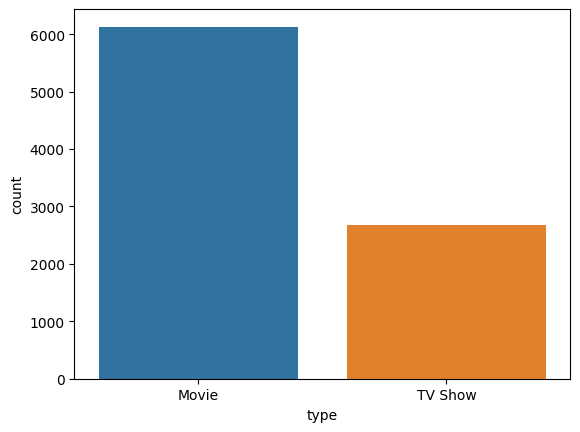

In [82]:
sns.countplot(data=netflix_1, x='type')

In [31]:
netflix_1['generes']=netflix['listed_in']
netflix_1=netflix_1.drop('listed_in', axis=1)

In [32]:
max_values = netflix_1['generes'].apply(lambda x: x.count(',') + 1)
column_names = [f'generes{i+1}' for i in range(max_values.max())]
netflix_1[column_names] = netflix_1['generes'].str.split(',', expand=True)
netflix_1=netflix_1.drop('generes', axis=1)

In [68]:
n_TV=netflix_1[netflix_1['type']=='TV Show']

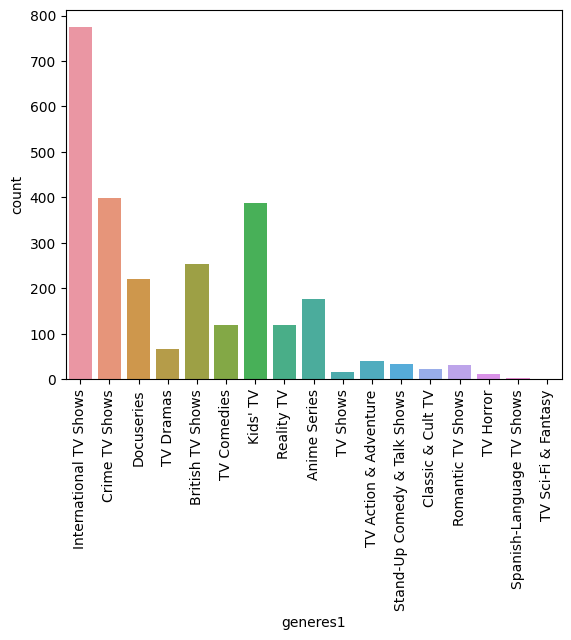

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [71]:
sns.countplot(data=n_TV, x='generes1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

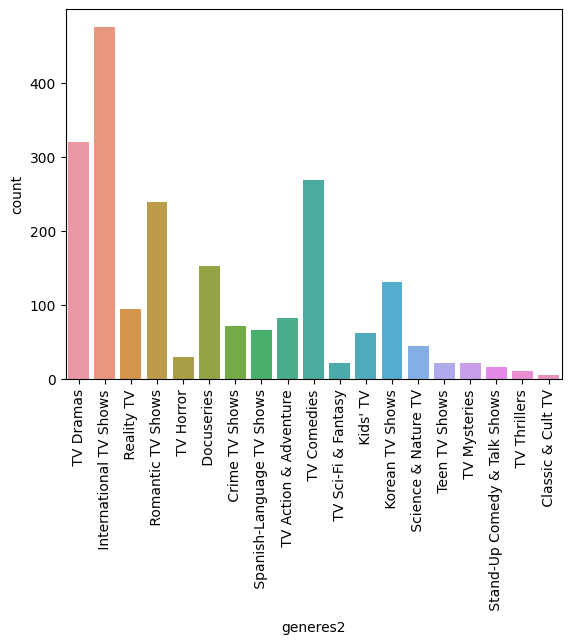

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [72]:
sns.countplot(data=n_TV, x='generes2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

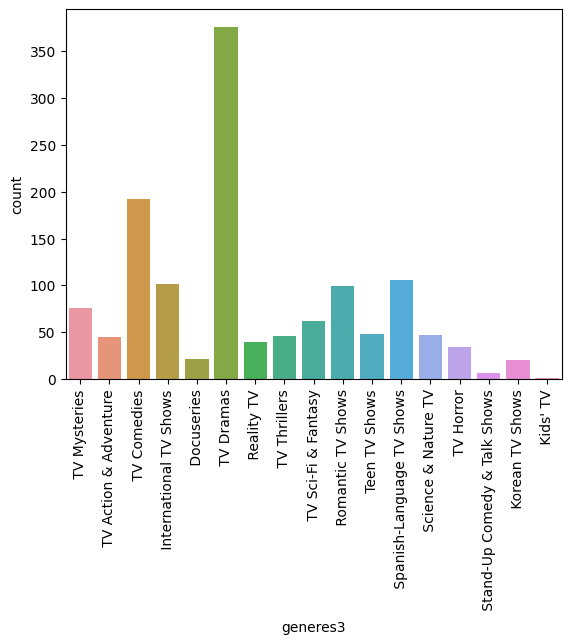

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [73]:
sns.countplot(data=n_TV, x='generes3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

In [77]:
n_movie=netflix_1[netflix_1['type']=='Movie']

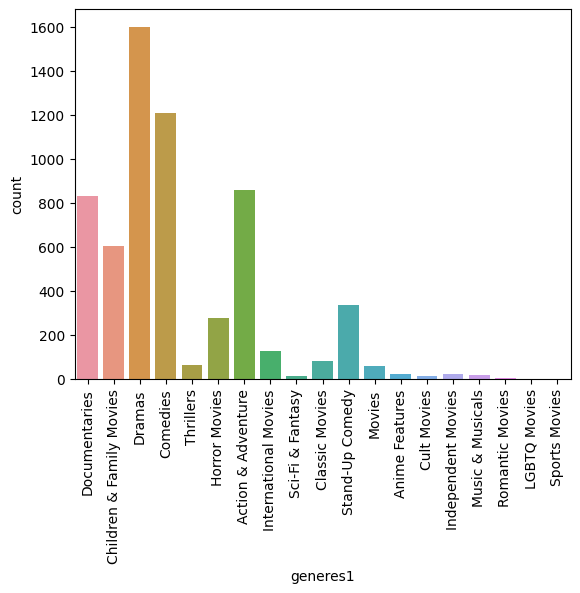

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [79]:
sns.countplot(data=n_movie, x='generes1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

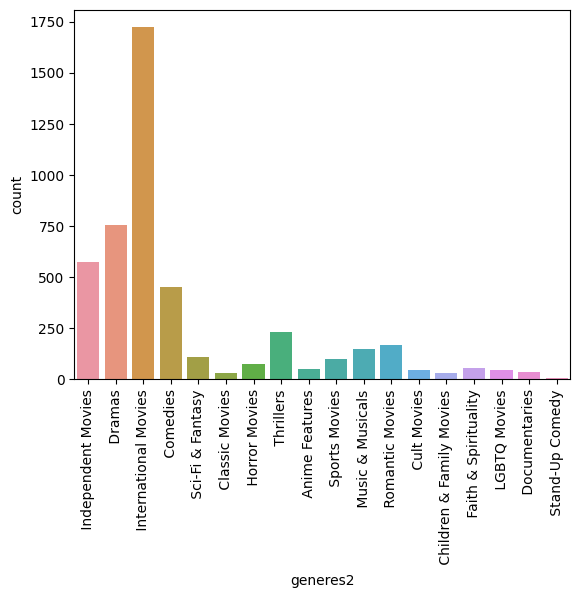

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [80]:
sns.countplot(data=n_movie, x='generes2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

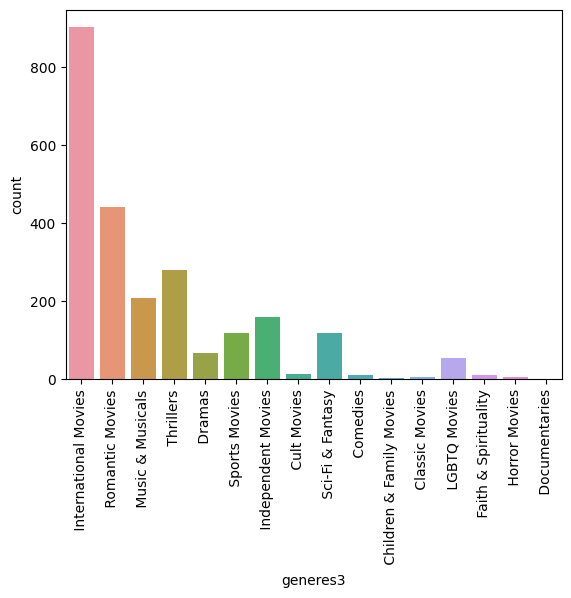

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [81]:
sns.countplot(data=n_movie, x='generes3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

<Axes: xlabel='type', ylabel='count'>

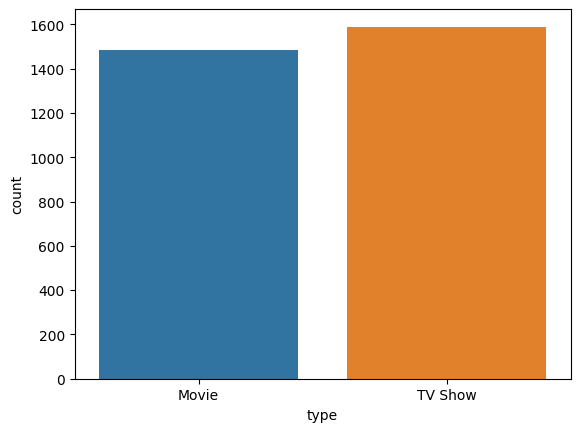

In [83]:
sns.countplot(data=hulu_1, x='type')

In [85]:
hulu_1['genres']=hulu['listed_in']
hulu_1=hulu_1.drop('listed_in', axis=1)
max_values = hulu_1['genres'].apply(lambda x: x.count(',') + 1)
column_names = [f'genres{i+1}' for i in range(max_values.max())]
hulu_1[column_names] = hulu_1['genres'].str.split(',', expand=True)
hulu_1=hulu_1.drop('genres', axis=1)

In [86]:
hulu_TV=hulu_1[hulu_1['type']=='TV Show']

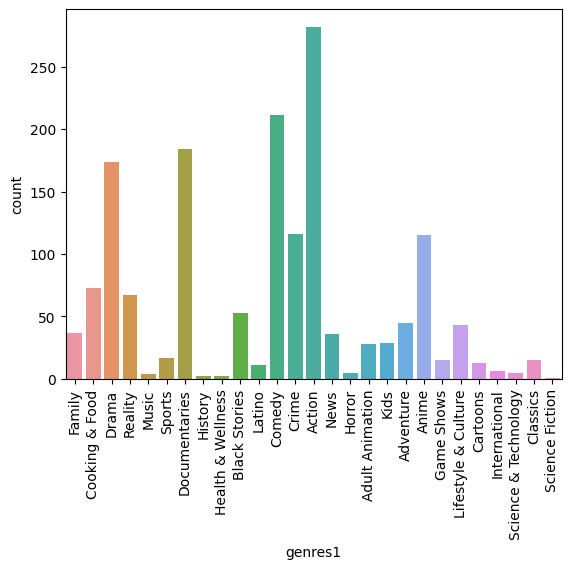

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [91]:
sns.countplot(data=hulu_TV, x='genres1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

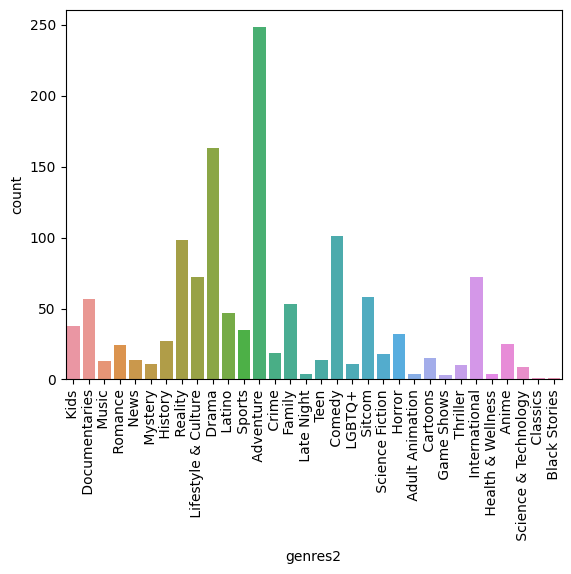

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [92]:
sns.countplot(data=hulu_TV, x='genres2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

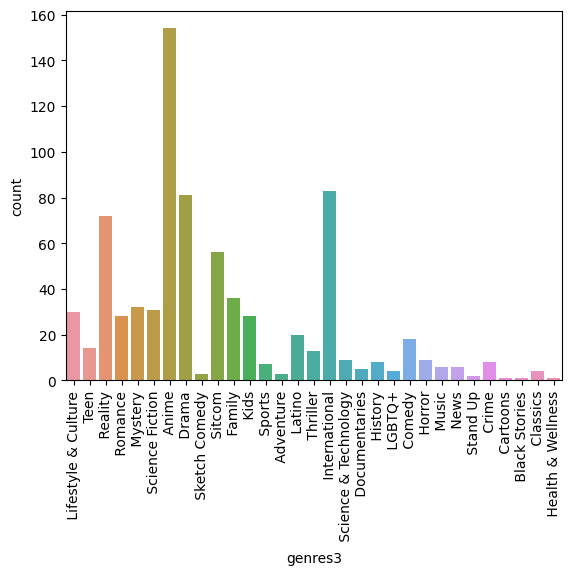

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [94]:
sns.countplot(data=hulu_TV, x='genres3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

In [95]:
hulu_movie=hulu_1[hulu_1['type']=='Movie']

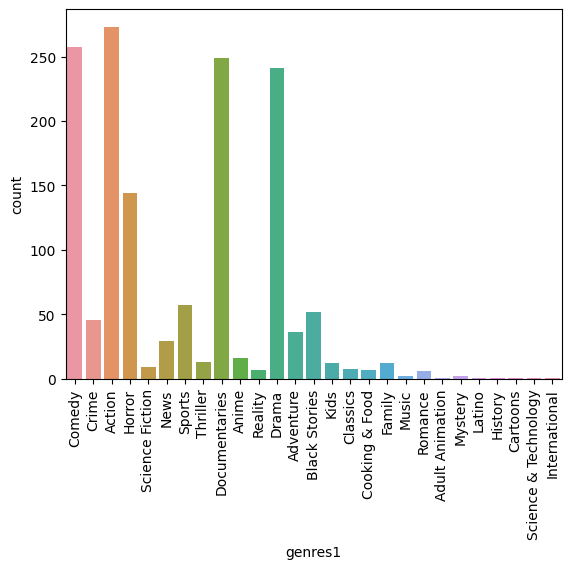

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [98]:
sns.countplot(data=hulu_movie, x='genres1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

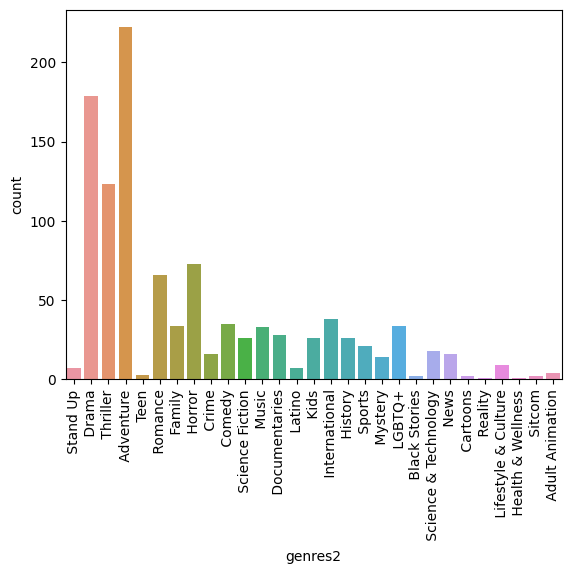

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [99]:
sns.countplot(data=hulu_movie, x='genres2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

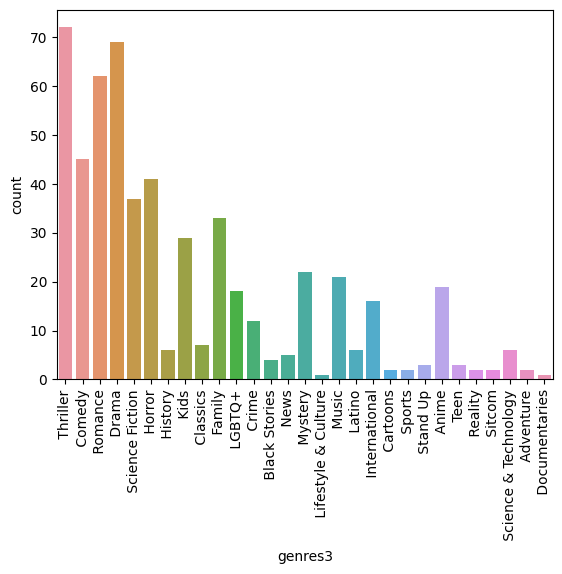

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [100]:
sns.countplot(data=hulu_movie, x='genres3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

<Axes: xlabel='type', ylabel='count'>

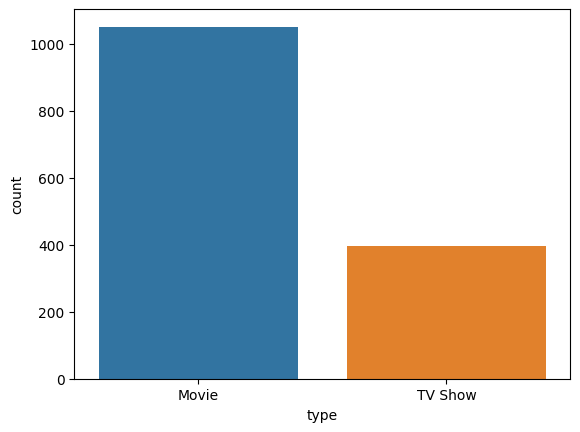

In [84]:
sns.countplot(data=disney_1, x='type')

In [117]:
disney_1=disney.copy()
disney_1['genres']=disney_1['listed_in']
disney_1=disney_1.drop('listed_in', axis=1)

In [121]:
max_values = disney_1['genres'].apply(lambda x: x.count(',') + 1)
column_names = [f'genres{i+1}' for i in range(max_values.max())]
disney_1[column_names] = disney_1['genres'].str.split(',', expand=True)
disney_1=disney_1.drop('genres', axis=1)

In [125]:
disney_TV=disney_1[disney_1['type']=='TV Show']

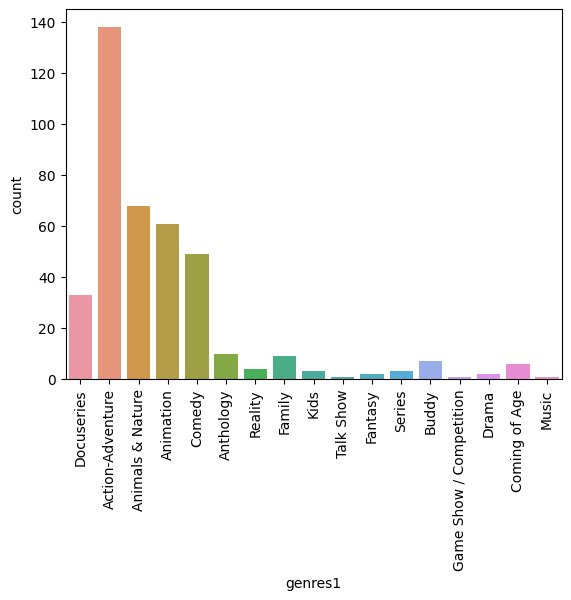

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [126]:
sns.countplot(data=disney_TV, x='genres1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

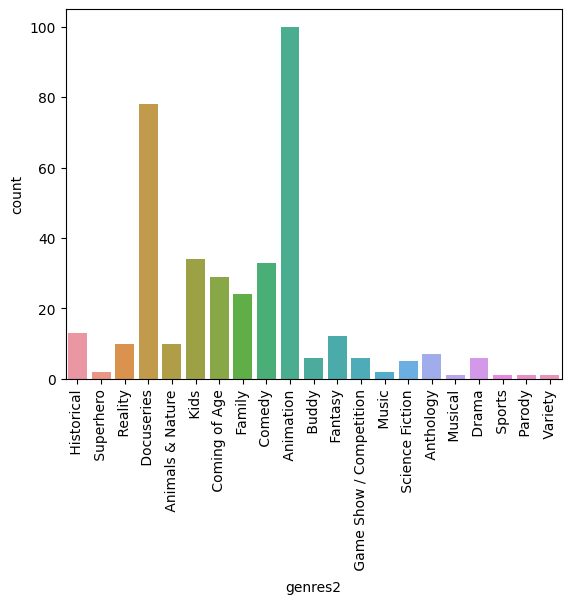

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [127]:
sns.countplot(data=disney_TV, x='genres2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

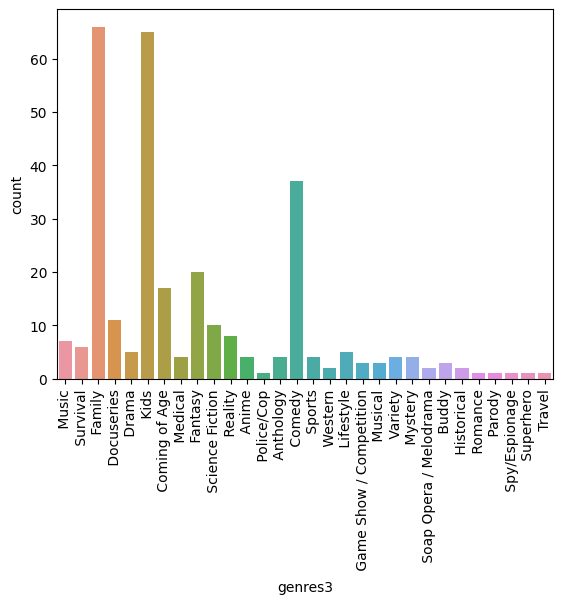

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [128]:
sns.countplot(data=disney_TV, x='genres3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

In [135]:
disney_movie=disney_1[disney_1['type']=='Movie']

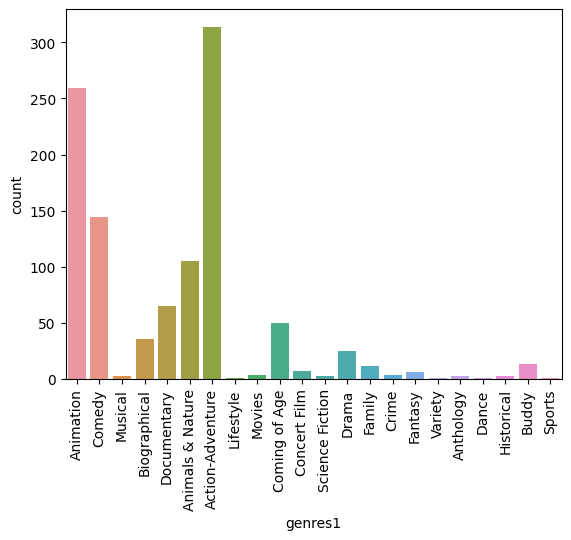

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [137]:
sns.countplot(data=disney_movie, x='genres1')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

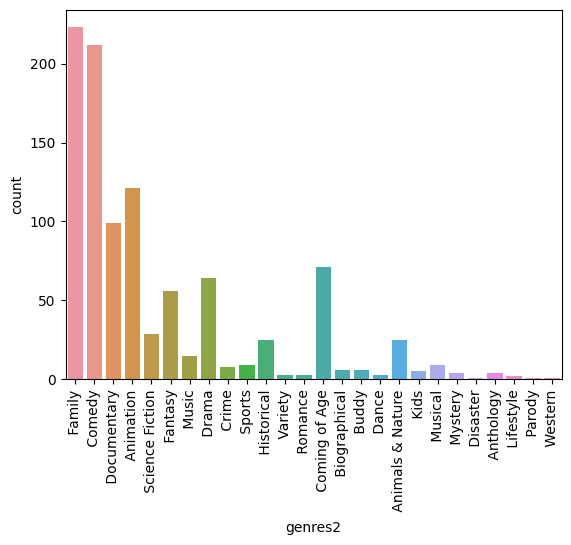

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [138]:
sns.countplot(data=disney_movie, x='genres2')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

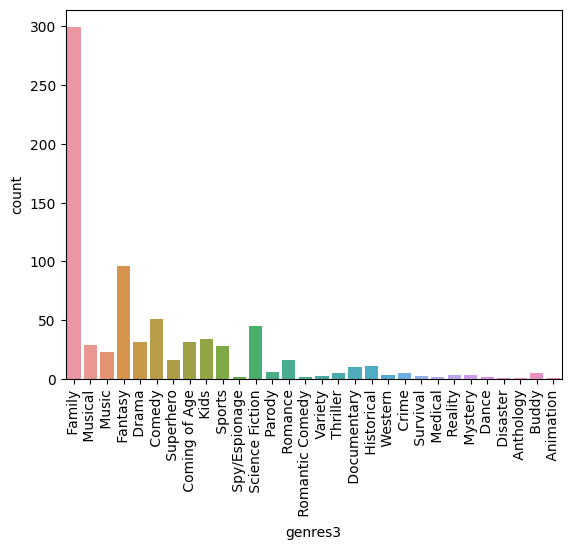

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [139]:
sns.countplot(data=disney_movie, x='genres3')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

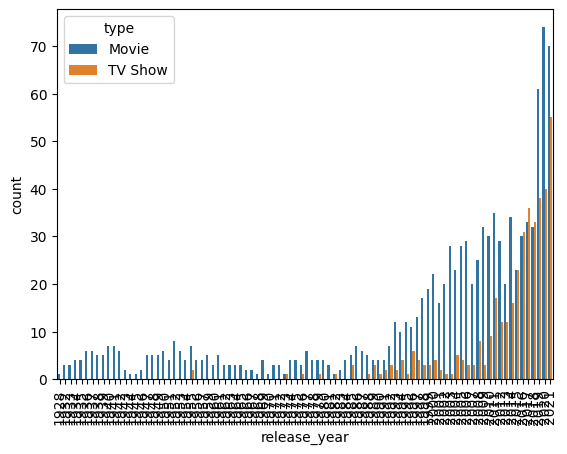

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [153]:
sns.countplot(x='release_year', data=disney, hue='type')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

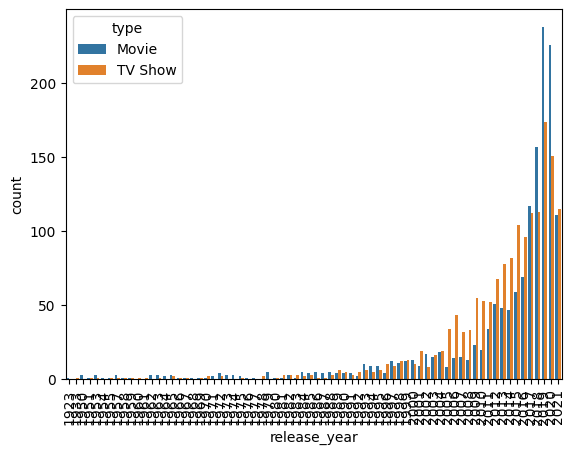

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [171]:
sns.countplot(x='release_year', data=hulu, hue='type')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))

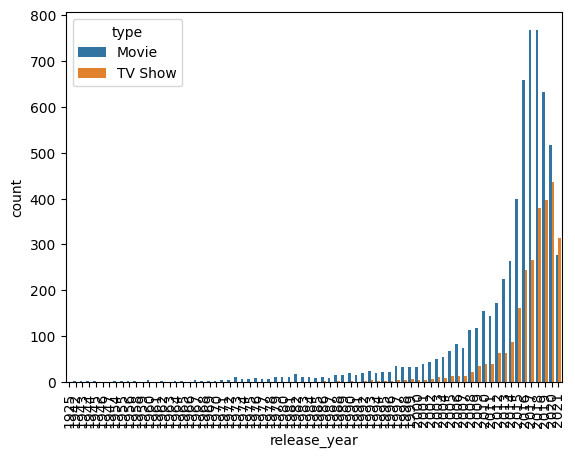

<Figure size 10000x600 with 0 Axes>

<Figure size 10000x600 with 0 Axes>

In [166]:
sns.countplot(x='release_year', data=netflix, hue='type')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(100, 6))